<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a Outliers

* Identificar outliers de forma visual y estadística.
* Decidir qué hacer con ellos.
* Aplicar técnicas para tratarlos usando pandas

## 1. Preparamos nuestro entorno

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos seaborn para que los gráficos se vean más bonitos
sns.set_theme(style="whitegrid")

## Creamos nuestro caso de estudio

In [ ]:
data = {
    'edad': [25, 28, 32, 35, 29, 31, 27, 33, 65, 90],
    'salario_anual': [50000, 52000, 58000, 61000, 54000, 59000, 51000, 62000, 150000, 200000]
}

df = pd.DataFrame(data)

print("Nuestros datos de ejemplo:")
df

Nuestros datos de ejemplo:


,edad,salario_anual
0,25,50000
1,28,52000
2,32,58000
3,35,61000
4,29,54000
5,31,59000
6,27,51000
7,33,62000
8,65,150000
9,90,200000


A simple vista, las edades de 65 y 90 años y los salarios de 150,000 y 200,000 parecen bastante más altos que el resto. ¿Serán outliers?

## 3. Detectando a los outliers: Métodos de detección

### 1. Técnica 1: El Diagrama de Caja (Box Plot)

El diagrama de caja es la herramienta estrella para detectar outliers visualmente. Nos muestra cómo se distribuyen los datos y señala con puntos individuales aquellos valores que se "escapan" de lo normal.
La caja representa el 50% central de los datos. La línea dentro de la caja es la mediana. Los "bigotes" (las líneas que se extienden desde la caja) marcan el rango de los datos que se consideran "normales". Cualquier punto fuera de esos bigotes es un potencial outlier.

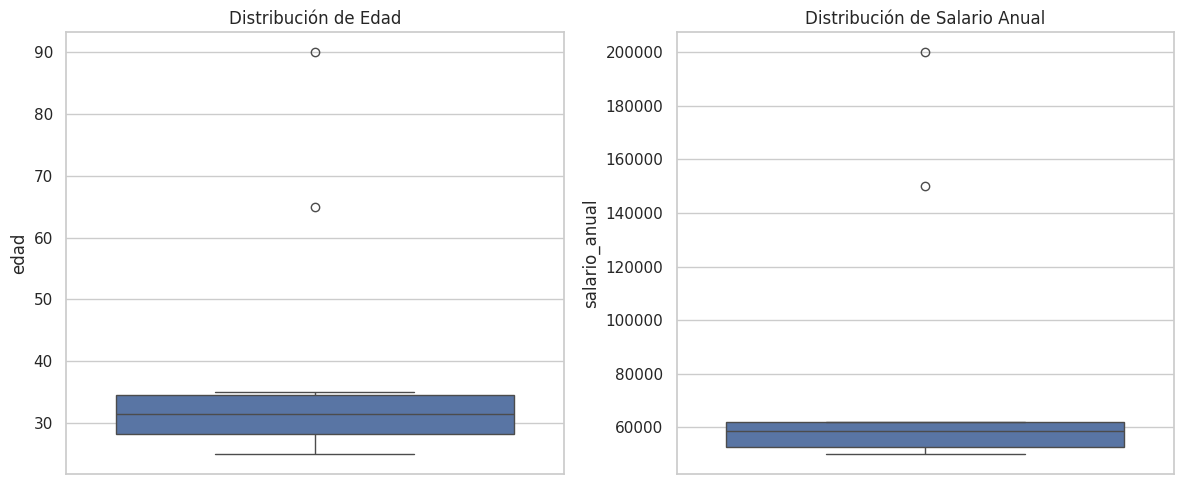

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot para la edad
plt.subplot(1, 2, 1)
sns.boxplot(y=df['edad'])
plt.title('Distribución de Edad')

# Boxplot para el salario
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salario_anual'])
plt.title('Distribución de Salario Anual')

plt.tight_layout()
plt.show()

### Técnica 2: El Rango Intercuartílico (IQR)

La visualización es genial, pero a veces necesitamos un método estadístico más riguroso. El método del Rango Intercuartílico (IQR) es el motor detrás del diagrama de caja.

La idea es simple:

1. Calculamos los cuartiles:
 * Q1 (Primer Cuartil): El valor que deja por debajo al 25% de los datos.
 * Q3 (Tercer Cuartil): El valor que deja por debajo al 75% de los datos.
2. Calculamos el IQR: Es la diferencia entre Q3 y Q1 (IQR = Q3 - Q1)
3. Definimos los límites: Cualquier dato que esté por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se considera un outlier.

In [ ]:
# 1. Calculamos Q1 y Q3
Q1_salario = df['salario_anual'].quantile(0.25)
Q3_salario = df['salario_anual'].quantile(0.75)

In [ ]:
# 2. Calculamos el IQR
IQR_salario = Q3_salario - Q1_salario

In [ ]:
# 3. Definimos los límites
limite_inferior_salario = Q1_salario - 1.5 * IQR_salario
limite_superior_salario = Q3_salario + 1.5 * IQR_salario

In [ ]:
print(f"Análisis para 'salario_anual':")
print(f"Q1: {Q1_salario}")
print(f"Q3: {Q3_salario}")
print(f"IQR: {IQR_salario}")
print(f"Límite Inferior: {limite_inferior_salario}")
print(f"Límite Superior: {limite_superior_salario}\n")

Análisis para 'salario_anual':
Q1: 52500.0
Q3: 61750.0
IQR: 9250.0
Límite Inferior: 38625.0
Límite Superior: 75625.0



In [ ]:
# Filtramos para encontrar los outliers
outliers_salario = df[(df['salario_anual'] < limite_inferior_salario) | (df['salario_anual'] > limite_superior_salario)]

print("Outliers de salario encontrados con el método IQR:")
print(outliers_salario)

Outliers de salario encontrados con el método IQR:
   edad  salario_anual
8    65         150000
9    90         200000


## 4. ¿Qué hacemos con los outliers?

Hemos encontrado a los outliers, ¿y ahora qué? No siempre hay que eliminarlos. La decisión depende del contexto.

* **¿Es un error?** Si un outlier se debe a un error al introducir los datos (ej: una edad de 200 años), lo más seguro es corregirlo o eliminarlo.
* **¿Es un dato real?** A veces, un outlier es un dato valioso que representa un caso real y excepcional (ej: el CEO de la empresa en nuestros datos de salarios). Eliminarlo podría quitarnos información importante.

### Estrategia 1: Eliminación

Esta es la opción más directa. Si estamos seguros de que los outliers son errores o no son representativos para nuestro análisis, podemos eliminarlos.

In [ ]:
# Creamos una copia del DataFrame para no modificar el original
df_sin_outliers = df.drop(outliers_salario.index)

In [ ]:
df_sin_outliers

,edad,salario_anual
0,25,50000
1,28,52000
2,32,58000
3,35,61000
4,29,54000
5,31,59000
6,27,51000
7,33,62000


### Estrategia 2: Acotación (Capping)

En lugar de eliminar, podemos "acotar" los outliers. Esto significa reemplazar los valores atípicos por el valor del límite superior o inferior que calculamos. Es una forma de reducir su impacto sin perder los datos.

In [ ]:
# Creamos otra copia para esta estrategia
df_acotado = df.copy()

# Usamos np.where para aplicar la lógica:
# si el valor es > limite_superior, lo reemplazamos por el límite.
# si no, lo dejamos como está.
df_acotado['salario_anual'] = np.where(
    df_acotado['salario_anual'] > limite_superior_salario,
    limite_superior_salario,
    df_acotado['salario_anual']
)

In [ ]:
print("DataFrame original:")
print(df)
print("\nDataFrame con salarios acotados:")
print(df_acotado)

DataFrame original:
   edad  salario_anual
0    25          50000
1    28          52000
2    32          58000
3    35          61000
4    29          54000
5    31          59000
6    27          51000
7    33          62000
8    65         150000
9    90         200000

DataFrame con salarios acotados:
   edad  salario_anual
0    25        50000.0
1    28        52000.0
2    32        58000.0
3    35        61000.0
4    29        54000.0
5    31        59000.0
6    27        51000.0
7    33        62000.0
8    65        75625.0
9    90        75625.0


### Estrategia 3: Imputación

Otra opción es reemplazar el outlier por un valor más "típico" del conjunto de datos, como la media o la mediana.

#### ¡Ojo! La media es muy sensible a los outliers. Si hay valores extremos, el promedio se verá afectado. La mediana, en cambio, es mucho más robusta y suele ser una mejor opción para la imputación.

In [ ]:
# Calculemos la mediana de los salarios ANTES de tratar los outliers
mediana_salario = df['salario_anual'].median()
print(f"La mediana del salario es: {mediana_salario}\n")

# Creamos una copia más
df_imputado = df.copy()

# Reemplazamos los outliers con la mediana
df_imputado.loc[outliers_salario.index, 'salario_anual'] = mediana_salario

print("DataFrame original:")
print(df)
print("\nDataFrame con salarios imputados (usando la mediana):")
print(df_imputado)

La mediana del salario es: 58500.0

DataFrame original:
   edad  salario_anual
0    25          50000
1    28          52000
2    32          58000
3    35          61000
4    29          54000
5    31          59000
6    27          51000
7    33          62000
8    65         150000
9    90         200000

DataFrame con salarios imputados (usando la mediana):
   edad  salario_anual
0    25          50000
1    28          52000
2    32          58000
3    35          61000
4    29          54000
5    31          59000
6    27          51000
7    33          62000
8    65          58500
9    90          58500
